# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction, and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Perform a linear regression using self-constructed functions
* Calculate the coefficient of determination using self-constructed functions
* Use the coefficient of determination to determine model performance

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the Python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=np.float64)
Y = np.array([7, 7, 8, 9, 9, 10, 10, 11, 11, 12], dtype=np.float64)


In [3]:
# Create function calculating slope
def cal_slope(x, y):
    return (x.mean() * y.mean() - (x*y).mean()) / (x.mean()**2 - (x**2).mean())

In [4]:
# Create function calculating intercept
def cal_intercept(x, y):
    slope = cal_slope(x, y)
    return y.mean() - (slope * x.mean())

In [5]:
# Create function predicting y-values
def predict(slope, intercept, x):
    return intercept + x * slope

In [6]:
# Create function calculating squared error between 2 arrays of values
def sq_err(y_real, y_predicted):
    return ((y_real - y_predicted)**2).sum()

In [7]:
# Create function calculating R-squared between 2 arrays of values
def r_squared(y_real, y_predicted):
    baseline = np.ones(len(y_real)) * y_real.mean()
    rrs = sq_err(y_real, y_predicted)
    rrt = sq_err(y_real, baseline)
    return (1 - rrs/rrt)

Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56 * X + 6.33


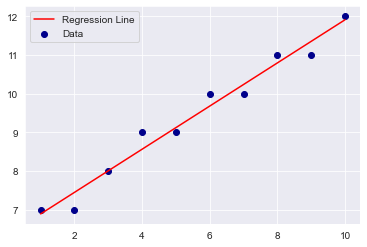

In [8]:
# Apply functions to calculate slope, intercept, predicted y-values, and R-squared for X & Y
slope = cal_slope(X, Y)
intercept = cal_intercept(X, Y)
Y_pred = predict(slope, intercept, X)
r_sqr = r_squared(Y, Y_pred)

# Print out results
print('Basic Regression Diagnostics')
print('----------------------------')
print(f'Slope: {round(slope,2)}')
print(f'Y-Intercept: {round(intercept,2)}')
print(f'R-Squared: {round(r_sqr,2)}')
print('----------------------------')
print(f'Model: Y = {round(slope,2)} * X + {round(intercept,2)}')

# Visualize
sns.set_style('darkgrid')
plt.scatter(X, Y, label='Data', color='darkblue')
plt.plot(X, Y_pred, label='Regression Line', color='red')
plt.legend()
plt.show();

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

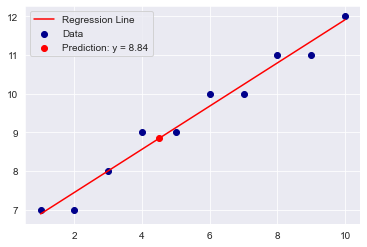

In [9]:
# Make prediction for x = 4.5 and visualize on the scatter plot
x = 4.5
predicted_y = predict(slope, intercept, x)

# Visualize
sns.set_style('darkgrid')
# Real Data
plt.scatter(X, Y, label='Data', color='darkblue')
# Regression Line
plt.plot(X, Y_pred, label='Regression Line', color='red')
# Predicted y value for x = 4.5
plt.scatter(x, predicted_y, label=f'Prediction: y = {round(predicted_y, 2)}', color='red')
plt.legend()
plt.show();

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use Python's built-in modules to perform similar analyses with a much higher level of sophistication. 